The following lines of code can be used to import Python Biogeme and estimate a simple model, using the sample Swiss Metro Dataset

In [2]:
pip install biogeme

  Using cached biogeme-3.2.14-py3-none-any.whl.metadata (2.6 kB)
  Using cached tomlkit-0.13.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached python_Levenshtein-0.26.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
  Using cached cythonbiogeme-1.0.4-cp311-cp311-linux_x86_64.whl
  Using cached biogeme_optimization-0.0.10-py3-none-any.whl.metadata (3.7 kB)
  Using cached levenshtein-0.26.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
Using cached biogeme-3.2.14-py3-none-any.whl (484 kB)
Using cached biogeme_optimization-0.0.10-py3-none-any.whl (48 kB)
Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)
Using cached python_Levenshtein-0.26.1-py3-none-any.whl (9.4 kB)
Using cached levenshtein-0.26.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (162 kB)
Using cached tomlkit-0.13.2-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.0 MB/s eta 0:

In [3]:
import pandas  as pd
import numpy as np
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
import biogeme.expressions as exp
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data_file = "data/netherlands_BL.dat"

In [11]:
data_file2 = "data/swissmetro_Lab1.dat"

In [12]:
df2 = pd.read_csv(data_file2, sep='\t')
df2


,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_FR,SM_TT,SM_CO,SM_FR,SM_SEATS,CAR_TT,CAR_CO,CHOICE
0,2,0,1,1,1,0,1,1,0,3,...,112,48,120,63,52,20,0,117,65,2
1,2,0,1,1,1,0,1,1,0,3,...,103,48,30,60,49,10,0,117,84,2
2,2,0,1,1,1,0,1,1,0,3,...,130,48,60,67,58,30,0,117,52,2
3,2,0,1,1,1,0,1,1,0,3,...,103,40,30,63,52,20,0,72,52,2
4,2,0,1,1,1,0,1,1,0,3,...,130,36,60,63,42,20,0,90,84,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,3,1,1,1192,4,1,7,1,0,5,...,148,13,30,93,17,30,0,156,56,2
10724,3,1,1,1192,4,1,7,1,0,5,...,148,12,30,96,16,10,0,96,70,3
10725,3,1,1,1192,4,1,7,1,0,5,...,148,16,60,93,16,20,0,96,56,3
10726,3,1,1,1192,4,1,7,1,0,5,...,178,16,30,96,17,30,0,96,91,2


In [17]:
df2['PURPOSE'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
df['purpose'].unique()

array([0, 1])

In [7]:
# Prepare the data

df = pd.read_csv(data_file, sep='\t')
df


,id,choice,purpose,age,gender,rail_ivtt,rail_cost,rail_transfers,rail_acc_time,rail_egr_time,car_ivtt,car_cost,car_walk_time,avail0,avail1
0,1,0,0,0,1,2.000,40.0,0,0.333,0.167,1.000,5.000,0.167,1,1
1,2,0,0,0,1,1.633,35.0,0,0.133,0.250,1.500,9.000,0.017,1,1
2,3,0,0,0,0,1.500,24.0,0,0.500,0.017,1.633,11.500,0.333,1,1
3,4,0,0,1,0,1.000,7.8,1,0.500,0.250,1.500,8.333,0.500,1,1
4,5,0,0,0,1,1.667,28.0,1,0.200,0.167,1.250,5.000,0.017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,231,0,0,0,0,1.667,38.0,1,0.333,0.417,1.333,14.000,0.067,1,1
224,232,0,0,0,0,1.667,40.0,1,0.167,0.500,1.333,17.500,0.000,1,1
225,233,0,0,1,0,1.750,27.0,0,0.083,0.250,1.500,6.250,0.333,1,1
226,234,0,0,0,0,1.250,44.0,1,0.167,0.333,1.250,21.667,0.017,1,1


In [29]:
df.value_counts('purpose')

purpose
0    191
1     37
Name: count, dtype: int64

/tmp/ipykernel_2012/3175367701.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='left');
/tmp/ipykernel_2012/3175367701.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(['Otherwise', 'Work'])


[Text(0, 0, 'Otherwise'), Text(1, 0, 'Work')]

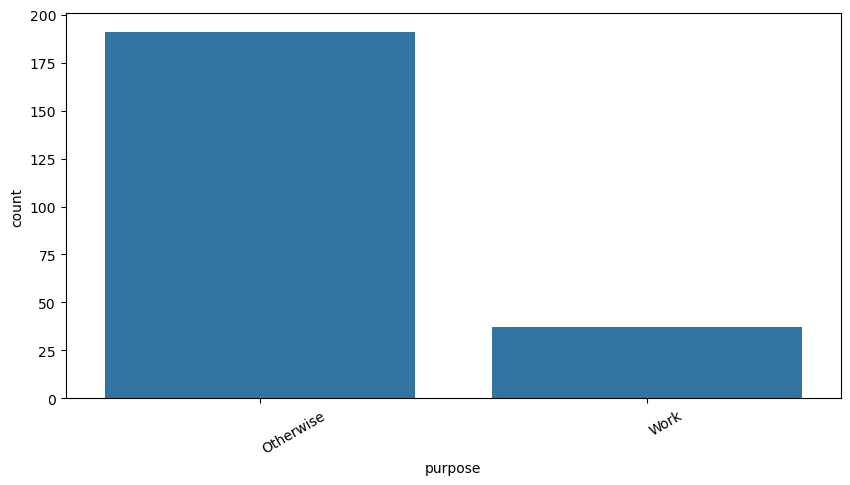

In [30]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='purpose', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='left');
chart.set_xticklabels(['Otherwise', 'Work'])

/tmp/ipykernel_2012/1782969199.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='left');
/tmp/ipykernel_2012/1782969199.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(['Commuter', 'Shopping', 'Business', 'Leisure', 'Return from work','Return from shopping', 'Return from business','Return from leisure','Other'])


[Text(0, 0, 'Commuter'),
 Text(1, 0, 'Shopping'),
 Text(2, 0, 'Business'),
 Text(3, 0, 'Leisure'),
 Text(4, 0, 'Return from work'),
 Text(5, 0, 'Return from shopping'),
 Text(6, 0, 'Return from business'),
 Text(7, 0, 'Return from leisure'),
 Text(8, 0, 'Other')]

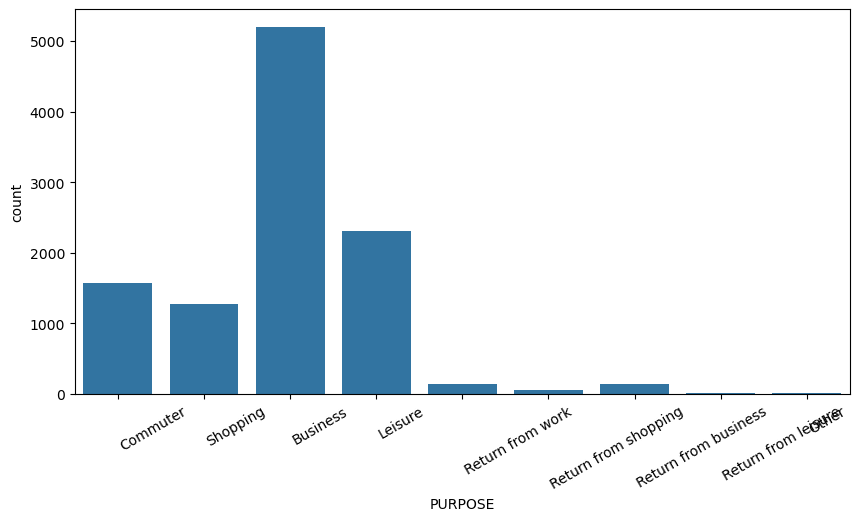

In [25]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='PURPOSE', data=df2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='left');
chart.set_xticklabels(['Commuter', 'Shopping', 'Business', 'Leisure', 'Return from work','Return from shopping', 'Return from business','Return from leisure','Other'])

## This is making each of these data columns into a gloabal variable so you can reffer to them directly through thier column header.


In [31]:
database = db.Database('netherlands_BL.dat', df)
globals().update(database.variables)


## There are some missing observations and things that biogme doesn't like so its saying that if the choice is equal to 0, so if they have chosen an alternative that is wqual to zero, than we are going to exlude those. 

In [33]:
#Exclude some observations
exclude = ((purpose != 1) *
           (purpose != 3) +
           (choice == 0)) >0
database.remove(exclude)

## This is for specification. If you remiber from the first lecture we talkied aobut how a part of our taks is to measure utility that is accosicated with a choice outcome. In this case we are declarig what variables we want to include. ASc sands fo alternate. The metro data we are working with is a data set where respondents are sating their prefereince to these constants: car, train, Swiss Metro. 

In [11]:
# Model Specification

# Parameters to be estimated
# Arguments:
#   - 1  Name for report; Typically, the same as the variable.
#   - 2  Starting value.
#   - 3  Lower bound.
#   - 4  Upper bound.
#   - 5  0: estimate the parameter, 1: keep it fixed.

ASC_CAR = exp.Beta('ASC_CAR',0,None,None,0)
ASC_TRAIN = exp.Beta('ASC_TRAIN',0,None,None,0)
ASC_SM = exp.Beta('ASC_SM',0,None,None,0)
B_TIME = exp.Beta('B_TIME',0,None,None,0)
B_COST = exp.Beta('B_COST',0,None,None,0)


You can find define new vairable by refining

In [12]:
#Define new variables
SM_COST =  SM_CO*(GA == 0)
TRAIN_COST = TRAIN_CO*(GA == 0)

CAR_AV_SP = CAR_AV * (SP != 0)
TRAIN_AV_SP = TRAIN_AV * (SP != 0)

TRAIN_TT_SCALED = TRAIN_TT / 100.0
TRAIN_COST_SCALED = TRAIN_COST / 100
SM_TT_SCALED = SM_TT / 100.0
SM_COST_SCALED = SM_COST / 100
CAR_TT_SCALED = CAR_TT / 100
CAR_CO_SCALED = CAR_CO / 100

/tmp/ipykernel_1236/3279920306.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
/tmp/ipykernel_1236/3279920306.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(['Commuter', 'Business']);


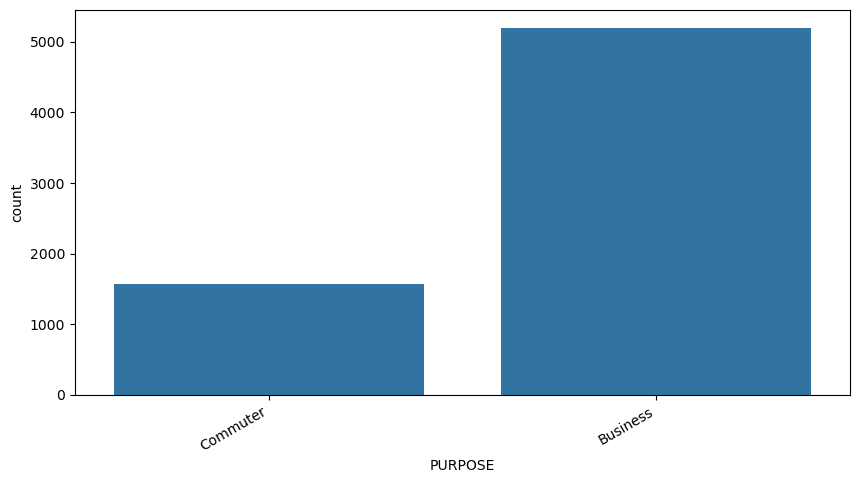

In [13]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='PURPOSE', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['Commuter', 'Business']);

V sub transit it equal to a contant plus a vairable time plus train travel time, pluse cost etc. 

In [ ]:
axes.xaxis.set_ticks(values_list)

/tmp/ipykernel_1236/1497331618.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
/tmp/ipykernel_1236/1497331618.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(['Yes']);
/tmp/ipykernel_1236/1497331618.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
/tmp/ipykernel_1236/1497331618.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(['No', 'Yes']);
/tmp/ipykernel_1236/1497331618.py:15: UserWarning: set_ticklabels() should only b

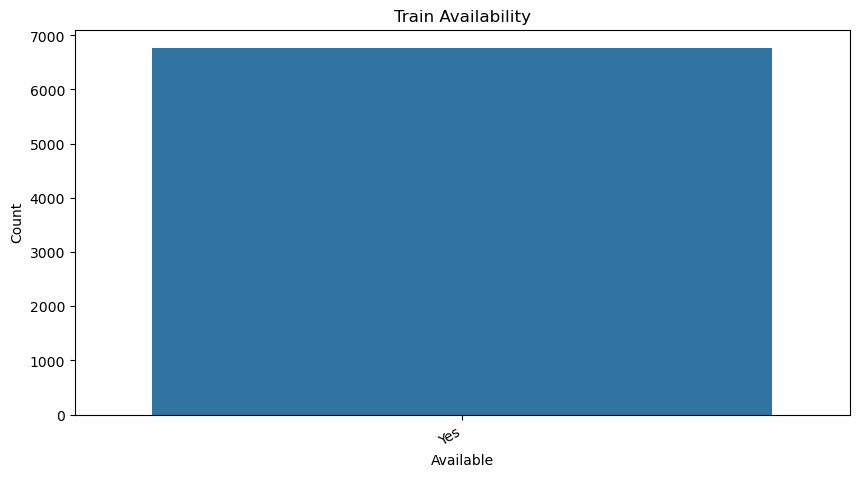

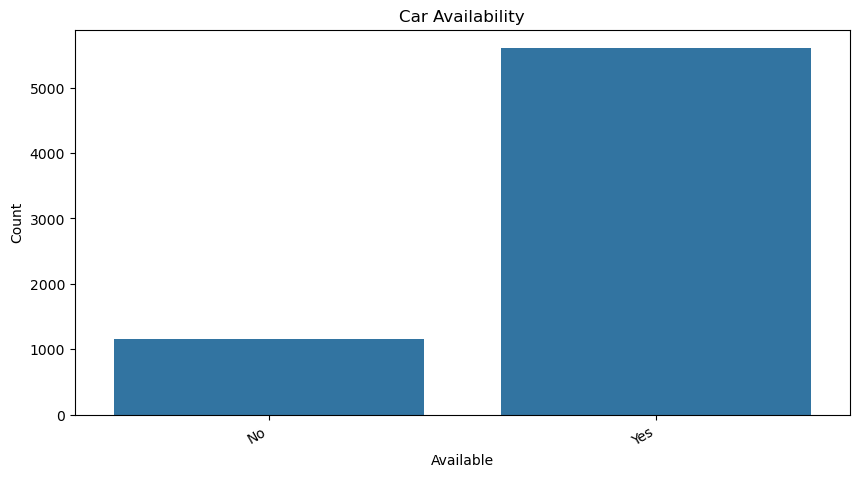

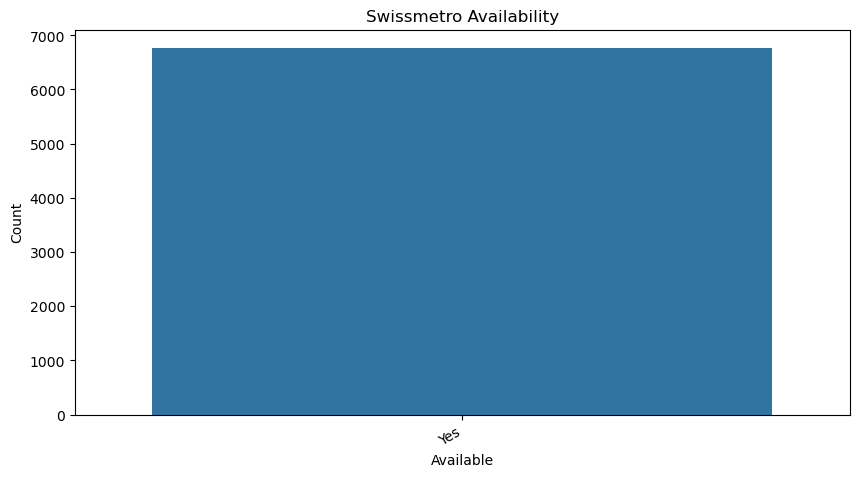

In [15]:
plt.figure(1, figsize=(10,5))
chart = sns.countplot(x = 'TRAIN_AV', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['Yes']);
chart.set(title='Train Availability', xlabel="Available", ylabel = "Count");

plt.figure(2, figsize=(10,5))
chart = sns.countplot(x = 'CAR_AV', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['No', 'Yes']);
chart.set(title='Car Availability', xlabel="Available", ylabel = "Count");

plt.figure(3, figsize=(10,5))
chart = sns.countplot(x = 'SM_AV', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
chart.set_xticklabels(['Yes']);
chart.set(title='Swissmetro Availability', xlabel="Available", ylabel = "Count");

In [23]:
# Specification of utilities
V_transit = ASC_TRAIN + \
    B_TIME * TRAIN_TT_SCALED + \
    B_COST * TRAIN_COST_SCALED
V_swissMetro = ASC_SM + \
    B_TIME * SM_TT_SCALED + \
    B_COST * SM_COST_SCALED
V_car = ASC_CAR + \
    B_TIME * CAR_TT_SCALED + \
    B_COST * CAR_CO_SCALED

In [24]:
# Associate utility functions with the numbering of alternatives
V = {1: V_transit,
     2: V_swissMetro,
     3: V_car}

It's imortant to indicate whehter the person has access to the alternatives. Availabity constant for someone who doesn't have a car would be zero

In [25]:
# Associate the availability conditions with the alternatives
av = {1: TRAIN_AV_SP,
      2: SM_AV,
      3: CAR_AV_SP}

The next three are basically assoicating the function for putting all fo these together

In [26]:
# The choice model is a logit, with availability conditions
logprob = models.loglogit(V,av,CHOICE)

In [27]:
# Initialize Biogeme
biogeme = bio.BIOGEME(database,logprob)
biogeme.modelName = "01logit"

File biogeme.toml has been created


In [28]:
#Run Biogeme to estimate model and store results
results = biogeme.estimate()

In [29]:
pandasResults = results.getEstimatedParameters()
pandasResults

/tmp/ipykernel_1646/4126013261.py:1: DeprecationWarning: getEstimatedParameters is deprecated; use get_estimated_parameters instead.
  pandasResults = results.getEstimatedParameters()


,Value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_CAR,0.130641,0.022957,5.690716,1.265081e-08
ASC_SM,0.285273,0.044724,6.378532,1.787939e-10
ASC_TRAIN,-0.415914,0.040884,-10.172982,0.000000e+00
B_COST,-1.083790,0.068225,-15.885521,0.000000e+00
B_TIME,-1.277859,0.104254,-12.257120,0.000000e+00


In [30]:
print(results)



Results for model 01logit
Output file (HTML):			01logit.html
Nbr of parameters:		5
Sample size:			6768
Excluded data:			3960
Init log likelihood:		-6964.663
Final log likelihood:		-5331.252
Likelihood ratio test (init):		3266.822
Rho square (init):			0.235
Rho bar square (init):			0.234
Akaike Information Criterion:	10672.5
Bayesian Information Criterion:	10706.6
Final gradient norm:		0.0007117737
ASC_CAR        : 0.131[0.0235 5.55 2.8e-08][0.023 5.69 1.27e-08]
ASC_SM         : 0.285[0.0291 9.79 0][0.0447 6.38 1.79e-10]
ASC_TRAIN      : -0.416[0.0306 -13.6 0][0.0409 -10.2 0]
B_COST         : -1.08[0.0518 -20.9 0][0.0682 -15.9 0]
B_TIME         : -1.28[0.0569 -22.5 0][0.104 -12.3 0]
('ASC_SM', 'ASC_CAR'):	-0.000234	-0.341	3.58	0.000348	-0.000428	-0.417	2.66	0.00785
('ASC_TRAIN', 'ASC_CAR'):	-0.00032	-0.445	-11.9	0	-9.91e-05	-0.106	-11.2	0
('ASC_TRAIN', 'ASC_SM'):	-0.000614	-0.69	-12.8	0	-0.00157	-0.86	-8.49	0
('B_COST', 'ASC_CAR'):	0.00032	0.263	-23.8	0	0.000296	0.189	-17.9	0
('B_COST'